In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from plot_metric.functions import BinaryClassification

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')


In [3]:
# Import dataset
df=pd.read_excel('To EDA SME PRoductivity Model.xlsx')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df

,DSTATS07,DISIC507,DPROVI07,IT1VCU07,RDNVCU07,RIMVCU07,EKSPOR07,YPRVCU07,PRPRCA07,YT1VCU07,SRMVCU07,SHFVCU07,SFNVCU07,V1101,V1103,V1106,V1109,V1112,HIGH PROD,MPUSAT,MDAERAH,MSWASTA,MASING,Pekerja Pria,Pekerja Wanita,gaji,BB bensin,BB solar,BB minyak tanah,BB batu bara,BB PGN,BB LPG,BB lain,BB pelumas,Tenaga Listrik
0,3,6,11,3485425,127686335,0,0,209483928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,892,219,13225290,47850,2678400,0,0,0,0,0,54600,134650
1,3,6,11,46200,47100000,0,1,48800000,0,0,0,0,167536,5843518,2390011,557667,35000,0,0,0,0,0,1,98,80,981638,589,109650,0,0,0,29875,0,6875,158750
2,3,6,11,12767660,159514,0,0,19699179,85,0,-51578,0,-44364,0,0,0,0,0,0,0,0,1,0,55,22,1101387,0,7658,0,0,0,0,0,0,259200
3,3,6,11,2500,230350,0,0,323850,95,0,-428000,255000,-85000,120000,200000,160000,300000,50000,1,0,0,1,0,27,4,258000,0,968,0,0,0,0,0,1478,26000
4,1,6,11,59925753,63095968,0,1,186598629,86,40237231,-6070846,16541198,114929807,6457906,80777694,434195416,4101577,9695266,0,1,0,0,0,924,54,18016687,0,2307995,0,0,45328893,0,0,0,2550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18299,1,6,76,7150,320650,0,0,551400,0,0,-40000,0,-20000,60000,50000,14500,72000,0,0,0,0,0,1,18,3,200800,4590,7200,0,0,0,0,0,2100,8400
18300,3,6,81,50000,2997000,0,0,8815000,92,0,0,0,32000,123000,350000,0,0,0,1,0,0,1,0,56,6,682800,3600,0,0,0,0,0,0,1440,24000
18301,3,6,94,21600,293100,0,0,4158000,80,0,11800,0,28740,40000,200000,30000,80000,0,1,0,0,1,0,18,3,277200,1620,1620,810,0,0,0,216,7680,1333
18302,2,6,94,15328810,88436547,0,1,94337550,53,98004194,1388700,317412,1176385,9941885,8261904,6306913,1399766,1647713,0,0,0,0,1,774,225,17557950,91643,24447034,81,0,0,0,0,753596,0


## Columns Legend

DSTATS07 : Company Status

DISIC507 : Main product of this manufacturing establishment

DPROVI07 : Province

IT1VCU07 : OTher expenses

RDNVCU07 : Value of domestic raw material used

RIMVCU07 : Value of imported raw material used

EKSPOR07 : Export any products

YPRVCU07 : value of all good produced during 2007

PRPRCA07 : Percentage of actual production to production                  capacity during 2007

YT1VCU07 : Total of other income received during 2007

SRMVCU07 : Stock of raw material fuel

SHFVCU0  : Stock of semi-finished products

SFNVCU07 : Stock of finished product

V1101    : Estimated value of land

V1103    : Estimated value of building

V1106    : Estimated value of machinery and equipment

V1109	 : Estimated value of vehicles

V1112    : Others estimated value of fixed capital

## One Hot Enconder

In [6]:
df=pd.get_dummies(df,columns=['DSTATS07','DISIC507'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18304 entries, 0 to 18303
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DPROVI07         18304 non-null  int64
 1   IT1VCU07         18304 non-null  int64
 2   RDNVCU07         18304 non-null  int64
 3   RIMVCU07         18304 non-null  int64
 4   EKSPOR07         18304 non-null  int64
 5   YPRVCU07         18304 non-null  int64
 6   PRPRCA07         18304 non-null  int64
 7   YT1VCU07         18304 non-null  int64
 8   SRMVCU07         18304 non-null  int64
 9   SHFVCU07         18304 non-null  int64
 10  SFNVCU07         18304 non-null  int64
 11  V1101            18304 non-null  int64
 12  V1103            18304 non-null  int64
 13  V1106            18304 non-null  int64
 14  V1109            18304 non-null  int64
 15  V1112            18304 non-null  int64
 16  HIGH PROD        18304 non-null  int64
 17  MPUSAT           18304 non-null  int64
 18  MDAERA

In [8]:
df['HIGH PROD'].unique()

array([0, 1], dtype=int64)

### Train test split

In [9]:
 x = df.drop(['HIGH PROD'],axis = 1)
y = df['HIGH PROD']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14643, 36)
(3661, 36)
(14643,)
(3661,)


#### Scaling data train

In [12]:
scaler_minmax = MinMaxScaler()

In [13]:
kolom_scale = ['IT1VCU07', 'RDNVCU07', 'RIMVCU07','YPRVCU07','PRPRCA07','YT1VCU07','SRMVCU07','SHFVCU07','SFNVCU07','V1101','V1103','V1106','V1109','V1112','Pekerja Pria','Pekerja Wanita','gaji','BB bensin','BB solar','BB minyak tanah','BB batu bara','BB PGN','BB LPG','BB lain','BB pelumas','Tenaga Listrik']

for i in kolom_scale:
    x_train[i] = scaler_minmax.fit_transform(np.array(x_train[i]).reshape(-1, 1))

#### Checking Imbalance

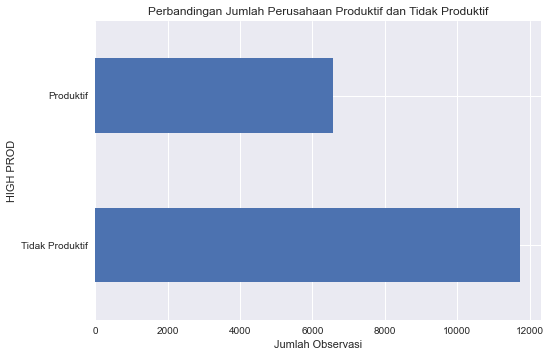

In [14]:
plt.style.use('seaborn')
df.groupby('HIGH PROD').count().iloc[:, 0].plot(kind='barh')
plt.title('Perbandingan Jumlah Perusahaan Produktif dan Tidak Produktif')
plt.xlabel('Jumlah Observasi')
plt.yticks(ticks=[1, 0], labels=['Produktif', 'Tidak Produktif'])
plt.show()

In [15]:
smote = SMOTE(random_state=41)
under_sampling = RandomUnderSampler(random_state=41)

In [16]:
y_train.value_counts()

0    9379
1    5264
Name: HIGH PROD, dtype: int64

In [17]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_under, y_under = under_sampling.fit_resample(x_train, y_train)

In [18]:
y_smote.value_counts()

0    9379
1    9379
Name: HIGH PROD, dtype: int64

In [19]:
y_under.value_counts()

0    5264
1    5264
Name: HIGH PROD, dtype: int64

# Modelling and testing

In [20]:

knn = KNeighborsClassifier(n_neighbors = 99)
rf = RandomForestClassifier(random_state = 123)
svm = SVC()
lr = LogisticRegression(random_state = 123)
dt = DecisionTreeClassifier(random_state = 123)

In [21]:
models = [rf, svm, lr, knn, dt]

for model in models:
    model.fit(x_train, y_train)

In [22]:
ypred_rf = rf.predict(x_test)
ypred_svm = svm.predict(x_test)
ypred_lr = lr.predict(x_test)
ypred_knn = knn.predict(x_test)
ypred_dt = dt.predict(x_test)

In [23]:
knn_under = knn.fit(x_under, y_under)
svm_under = svm.fit(x_under,y_under)
lr_under = lr.fit(x_under,y_under)
rf_under = rf.fit(x_under,y_under)
dt_under = dt.fit(x_under,y_under)
knn_smote = knn.fit(x_smote, y_smote)
svm_smote = svm.fit(x_smote,y_smote)
lr_smote = lr.fit(x_smote,y_smote)
rf_smote = rf.fit(x_smote,y_smote)
dt_smote = dt.fit(x_smote,y_smote)

In [24]:
ypred_knn_under = knn_under.predict(x_test)
ypred_svm_under = svm_under.predict(x_test)
ypred_lr_under = lr_under.predict(x_test)
ypred_rf_under = rf_under.predict(x_test)
ypred_dt_under = dt_under.predict(x_test)
ypred_knn_smote = knn_smote.predict(x_test)
ypred_svm_smote = svm_smote.predict(x_test)
ypred_lr_smote = lr_smote.predict(x_test)
ypred_rf_smote = rf_smote.predict(x_test)
ypred_dt_smote = dt_smote.predict(x_test)

# Evaluating

In [25]:
eval_rf = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf)*100, recall_score(y_test, ypred_rf)*100,
                    precision_score(y_test, ypred_rf)*100, roc_auc_score(y_test, ypred_rf)*100,
                    f1_score(y_test, ypred_rf)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Model Score (%)'])

eval_lr = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr)*100, recall_score(y_test, ypred_lr)*100,
                    precision_score(y_test, ypred_lr)*100, roc_auc_score(y_test, ypred_lr)*100,
                    f1_score(y_test, ypred_lr)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Model Score (%)'])

eval_dt = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt)*100, recall_score(y_test, ypred_dt)*100,
                    precision_score(y_test, ypred_dt)*100, roc_auc_score(y_test, ypred_dt)*100,
                    f1_score(y_test, ypred_dt)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Model Score (%)'])

eval_svm = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm)*100, recall_score(y_test, ypred_svm)*100,
                    precision_score(y_test, ypred_svm)*100, roc_auc_score(y_test, ypred_svm)*100,
                    f1_score(y_test, ypred_svm)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Model Score (%)'])

eval_knn = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn)*100, recall_score(y_test, ypred_knn)*100,
                    precision_score(y_test, ypred_knn)*100, roc_auc_score(y_test, ypred_knn)*100,
                    f1_score(y_test, ypred_knn)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Model Score (%)'])

eval_rf_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf_under)*100, recall_score(y_test, ypred_rf_under)*100,
                    precision_score(y_test, ypred_rf_under)*100, roc_auc_score(y_test, ypred_rf_under)*100,
                    f1_score(y_test, ypred_rf_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Undersampling Model Score (%)'])

eval_lr_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr_under)*100, recall_score(y_test, ypred_lr_under)*100,
                    precision_score(y_test, ypred_lr_under)*100, roc_auc_score(y_test, ypred_lr_under)*100,
                    f1_score(y_test, ypred_lr_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Undersampling Model Score (%)'])

eval_dt_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt_under)*100, recall_score(y_test, ypred_dt_under)*100,
                    precision_score(y_test, ypred_dt_under)*100, roc_auc_score(y_test, ypred_dt_under)*100,
                    f1_score(y_test, ypred_dt_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Undersampling Model Score (%)'])

eval_svm_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm_under)*100, recall_score(y_test, ypred_svm_under)*100,
                    precision_score(y_test, ypred_svm_under)*100, roc_auc_score(y_test, ypred_svm_under)*100,
                    f1_score(y_test, ypred_svm_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Undersampling Model Score (%)'])

eval_knn_under = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn_under)*100, recall_score(y_test, ypred_knn_under)*100,
                    precision_score(y_test, ypred_knn_under)*100, roc_auc_score(y_test, ypred_knn_under)*100,
                    f1_score(y_test, ypred_knn_under)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Undersampling Model Score (%)'])

eval_rf_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_rf_smote)*100, recall_score(y_test, ypred_rf_smote)*100,
                    precision_score(y_test, ypred_rf_smote)*100, roc_auc_score(y_test, ypred_rf_smote)*100,
                    f1_score(y_test, ypred_rf_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['RF Smote Model Score (%)'])

eval_lr_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_lr_smote)*100, recall_score(y_test, ypred_lr_smote)*100,
                    precision_score(y_test, ypred_lr_smote)*100, roc_auc_score(y_test, ypred_lr_smote)*100,
                    f1_score(y_test, ypred_lr_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['LR Smote Model Score (%)'])

eval_dt_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_dt_smote)*100, recall_score(y_test, ypred_dt_smote)*100,
                    precision_score(y_test, ypred_dt_smote)*100, roc_auc_score(y_test, ypred_dt_smote)*100,
                    f1_score(y_test, ypred_dt_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['DT Smote Model Score (%)'])

eval_svm_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_svm_smote)*100, recall_score(y_test, ypred_svm_smote)*100,
                    precision_score(y_test, ypred_svm_smote)*100, roc_auc_score(y_test, ypred_svm_smote)*100,
                    f1_score(y_test, ypred_svm_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['SVM Smote Model Score (%)'])

eval_knn_smote = pd.DataFrame(data = [accuracy_score(y_test, ypred_knn_smote)*100, recall_score(y_test, ypred_knn_smote)*100,
                    precision_score(y_test, ypred_knn_smote)*100, roc_auc_score(y_test, ypred_knn_smote)*100,
                    f1_score(y_test, ypred_knn_smote)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['KNN Smote Model Score (%)'])

eval_all = pd.concat([eval_lr, eval_dt, eval_rf, eval_svm, eval_knn, eval_lr_under, eval_dt_under, eval_rf_under, eval_svm_under, eval_knn_under, eval_lr_smote, eval_dt_smote, eval_rf_smote, eval_svm_smote, eval_knn_smote], axis=1)
eval_all

,LR Model Score (%),DT Model Score (%),RF Model Score (%),SVM Model Score (%),KNN Model Score (%),LR Undersampling Model Score (%),DT Undersampling Model Score (%),RF Undersampling Model Score (%),SVM Undersampling Model Score (%),KNN Undersampling Model Score (%),LR Smote Model Score (%),DT Smote Model Score (%),RF Smote Model Score (%),SVM Smote Model Score (%),KNN Smote Model Score (%)
accuracy,72.329964,45.042338,40.644633,64.408632,65.774379,71.892925,47.090959,52.362742,64.408632,71.674406,71.892925,47.090959,52.362742,64.408632,71.674406
recall,26.477360,61.243285,70.836531,0.000000,4.067536,24.481965,58.403684,42.133538,0.000000,23.637759,24.481965,58.403684,42.133538,0.000000,23.637759
precision,86.250000,34.620390,33.983800,0.000000,94.642857,87.637363,35.296846,35.672515,0.000000,88.000000,87.637363,35.296846,35.672515,0.000000,88.000000
roc_auc_score,62.072437,48.666596,47.398757,50.000000,51.970155,61.286784,49.621689,50.074403,50.000000,60.928294,61.286784,49.621689,50.074403,50.000000,60.928294
f1_score,40.516735,44.235033,45.931824,0.000000,7.799853,38.272346,44.001156,38.634764,0.000000,37.265578,38.272346,44.001156,38.634764,0.000000,37.265578


### Choose the best model

I will use a model who had a higher precision score,lower recall score and the bigger ROC score.

So, the model that we could use are Logistic Regression and KNN with SMOTE and Undersampling.

In [26]:
def CM(x,y):
    print(classification_report(y_test, y))
    plot_confusion_matrix(x, x_test, y_test)
    plt.grid(False)

In [27]:
def ROC(y):
    bc = BinaryClassification(y_test, y, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      2358
           1       0.86      0.26      0.41      1303

    accuracy                           0.72      3661
   macro avg       0.78      0.62      0.61      3661
weighted avg       0.76      0.72      0.67      3661



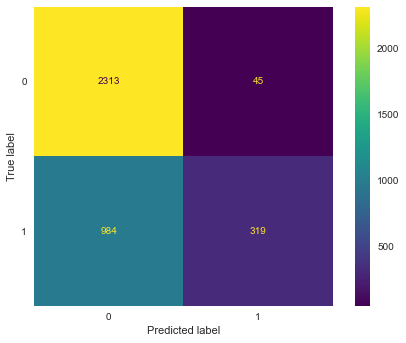

In [28]:
#Logistic Regression
CM(lr,ypred_lr)

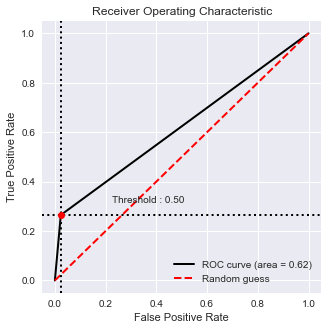

In [29]:
ROC(ypred_lr)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      2358
           1       0.95      0.04      0.08      1303

    accuracy                           0.66      3661
   macro avg       0.80      0.52      0.43      3661
weighted avg       0.76      0.66      0.54      3661



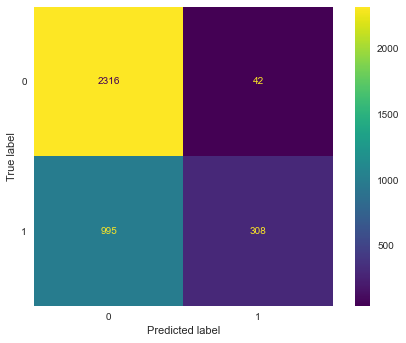

In [30]:
#KNN
CM(knn,ypred_knn)

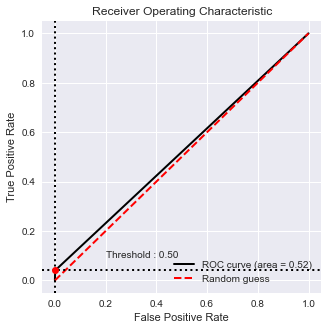

In [31]:
ROC(ypred_knn)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      2358
           1       0.88      0.24      0.38      1303

    accuracy                           0.72      3661
   macro avg       0.79      0.61      0.60      3661
weighted avg       0.76      0.72      0.66      3661



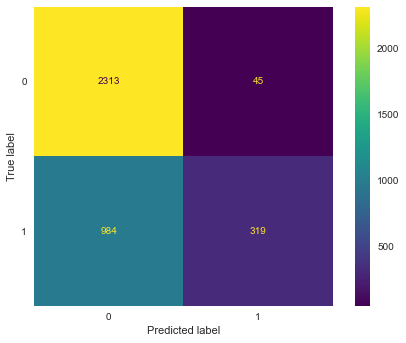

In [32]:
#logistic regression undersampling
CM(lr_under,ypred_lr_under)

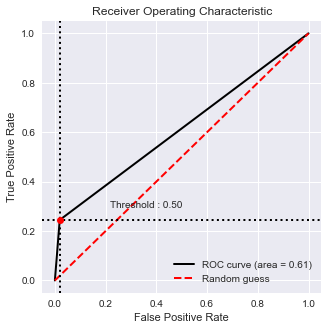

In [33]:
ROC(ypred_lr_under)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      2358
           1       0.88      0.24      0.37      1303

    accuracy                           0.72      3661
   macro avg       0.79      0.61      0.59      3661
weighted avg       0.76      0.72      0.66      3661



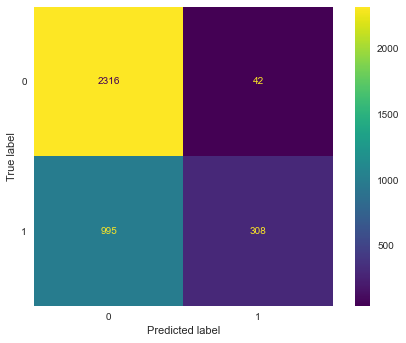

In [34]:
#KNN Undersampling
CM(knn_under,ypred_knn_under)

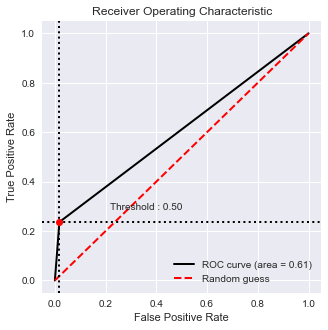

In [35]:
ROC(ypred_knn_under)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      2358
           1       0.88      0.24      0.38      1303

    accuracy                           0.72      3661
   macro avg       0.79      0.61      0.60      3661
weighted avg       0.76      0.72      0.66      3661



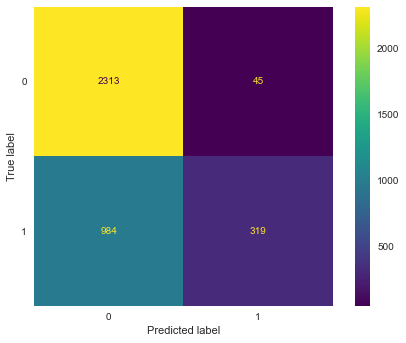

In [36]:
#logistic regression smote
CM(lr_smote,ypred_lr_smote)

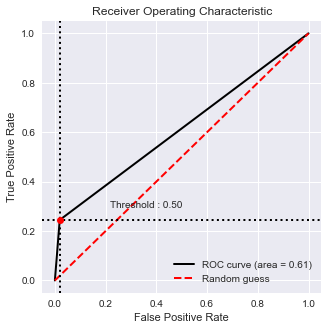

In [37]:
ROC(ypred_lr_smote)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      2358
           1       0.88      0.24      0.37      1303

    accuracy                           0.72      3661
   macro avg       0.79      0.61      0.59      3661
weighted avg       0.76      0.72      0.66      3661



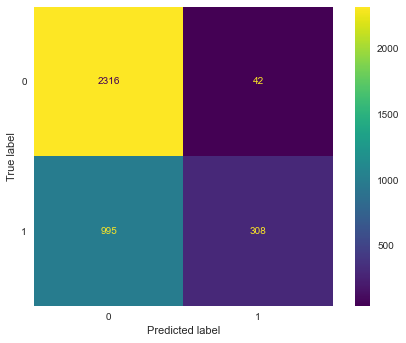

In [38]:
#KNN Smote
CM(knn_smote,ypred_knn_smote)

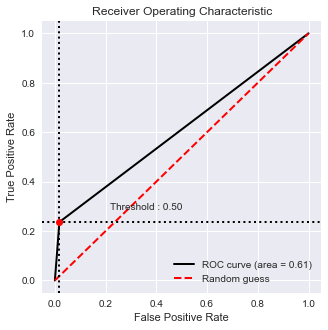

In [39]:
ROC(ypred_knn_smote)

---------

### Conclusion

After several deep investigation, we can see that Logistic Regression have the best model to predict the data with a score of recall 0 is 0.98 and the score of precision 1 is 0.86 with ROC curve score is 0.62